In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from decimal import Decimal
import os
from iminuit import Minuit, describe
#%matplotlib notebook

## Try the lattice stuff again, but cleaner.

x_new from PRL formula 0.001700


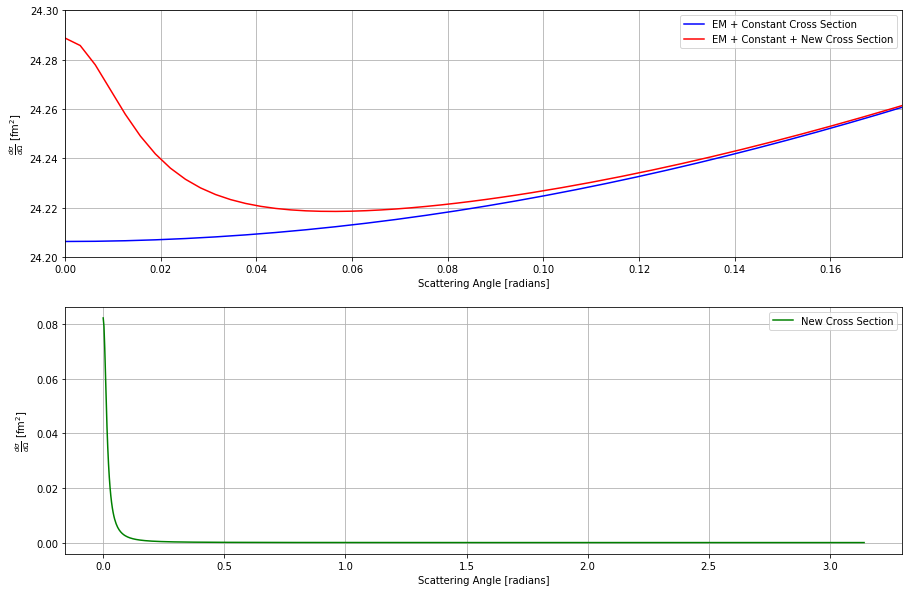

<Figure size 720x504 with 0 Axes>

In [3]:
# Let's use angstroms, eV but scattering lengths in fm
# Primitive Cubic Lattice of Xenon spacing between particles a = 100 Å

Z = 54 # Xenon 
wavelength = 1 # Å
lattice_spacing = 100 # Å 
mu = 200 # eV
q_0 = 6.86 # Å^-1
k = 2*np.pi/wavelength # Å^-1


b_F = -1.468e-3 # fm, Foldy scattering length from VF Sears article 

r_N_square = -0.1161 # PRL, fm^2
a_0 = 5.2917721067e4 # Scipy value, fm
b_I = (1/3)*(const.m_p/const.m_e)*(r_N_square/a_0) # fm Intrinsic scattering length
b_c = 4.92 # fm, Xe coherent scattering length from NIST database

# Dimensionless constants from scattering lengths
x_em = -Z*(b_F + b_I)/b_c # Need - sign to make a sensible em x-section, also Sears Eq 3.19 has - out front

# Now let's bring in the new force. Formula from PRL, depends on µ and g

x_new = 0.0017
print("x_new from PRL formula %f" % x_new)
#x_new = 2e-3

# Let's plot the vanilla cross section first with 1 angstrom

theta = np.linspace(0, np.pi, 1000)
q = 2*k*np.sin(theta/2)
f = (1 + 3 *(q/q_0)**2)**-0.5
x_sect = b_c**2 * (1 + 2*x_em*(1-f))
dsig_dtheta = 2*np.pi*np.sin(theta)*x_sect


# Convert reciprocal lattice vector to momentum transfer with p = hbar * k
h_bar = 6.58211956e-16 # eV s
c_angstrom_per_sec = 2.998e+18 # speed of light in angstrom per second
q_transfer_energy = h_bar * q * c_angstrom_per_sec # eV s * Å^-1 * Ås^-1 = eV
x_sect_new = b_c**2 * (2*x_new* (mu**2)/(q_transfer_energy**2 + mu**2))

factor = (k/q_0)**2
integral_x_sect = 2*np.pi*b_c**2*(2 + 4*x_em) - 2*x_em*((2*np.sqrt(12*factor-1)+1)/(6*factor))


fig, axs = plt.subplots(2,figsize=(15,10))
axs[0].plot(theta, x_sect, c='b', label='EM + Constant Cross Section')
axs[0].plot(theta, x_sect + x_sect_new, c='r', label='EM + Constant + New Cross Section')
axs[1].plot(theta, x_sect_new, c='g', label='New Cross Section')

axs[0].set(xlabel='Scattering Angle [radians]')
axs[1].set(xlabel='Scattering Angle [radians]')
axs[0].set(xlim=(0,0.175))
axs[0].set(ylim=(24.20,24.3))
axs[0].set(ylabel=r'$\frac{d\sigma}{d\Omega} \ [\mathrm{fm}^2]$')
axs[1].set(ylabel=r'$\frac{d\sigma}{d\Omega} \ [\mathrm{fm}^2]$')

axs[0].legend(loc='best')
axs[1].legend(loc='best')
axs[0].grid()
axs[1].grid()

#plt.plot(theta, q, c='g')
plt.figure(figsize=(10,7))
plt.show()

# Now go to orthorhombic lattice with different vector lengths a -> a,b,c

x_new from PRL formula 0.001700
0.050020856805770016 0.1001674211615598


/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


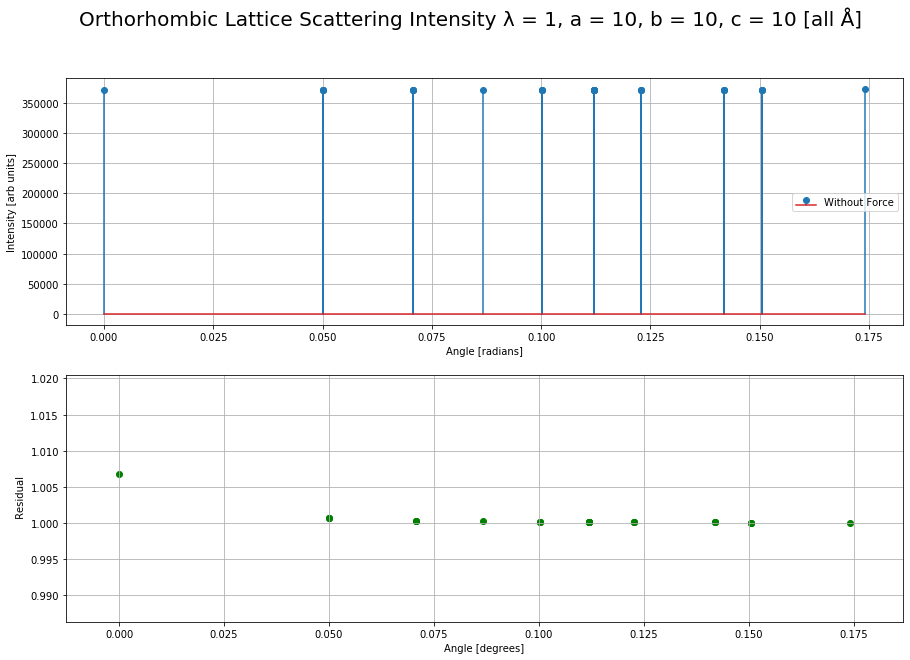

In [6]:
# Let's use angstroms, eV but scattering lengths in fm
# Primitive Cubic Lattice of Xenon spacing between particles a = 100 Å

Z = 54 # Xenon 
wavelength = 1 # Å
lattice_spacing = 100 # Å 
mu = 200 # eV
q_0 = 6.86 # Å^-1
k = 2*np.pi/wavelength # Å^-1


b_F = -1.468e-3 # fm, Foldy scattering length from VF Sears article 

r_N_square = -0.1161 # PRL, fm^2
a_0 = 5.2917721067e4 # Scipy value, fm
b_I = (1/3)*(const.m_p/const.m_e)*(r_N_square/a_0) # fm Intrinsic scattering length
b_c = 4.92 # fm, Xe coherent scattering length from NIST database

# Dimensionless constants from scattering lengths
x_em = -Z*(b_F + b_I)/b_c # Need - sign to make a sensible em x-section, also Sears Eq 3.19 has - out front

# Now let's bring in the new force. Formula from PRL, depends on µ and g

x_new = 0.0017
print("x_new from PRL formula %f" % x_new)
#x_new = 2e-3

h_bar = 6.58211956e-16 # eV s
c_angstrom_per_sec = 2.998e+18 # speed of light in angstrom per second

def complex_exp(x):
    return np.exp(-2*np.pi*1j*x)

def F_orthorhombic_cubic(h,k,l,f,a,b,c):
    """Orthorhombic with basis points at (0,0,0), (a,0,0), (0,b,0), (0,0,c)"""
    point_0 = complex_exp(0.0)
    point_1 = complex_exp(a*h)
    point_2 = complex_exp(b*k)
    point_3 = complex_exp(c*l)
    return f*(point_0 + point_1 + point_2 + point_3)

def hkl_theta_orthorhombic(h,k,l,wavelength,a,b,c):
    """Convert Miller planes in reciprocal space to angles"""
    try:
        return np.arcsin(wavelength/2 * np.sqrt((h/a)**2 + (k/b)**2 + (l/c)**2))
    except ValueError as e:
        os.exit(1)

def I_ortho(h,k,l,f,a,b,c):
    """Intensity, ~ F^2"""
    return np.absolute(F_orthorhombic_cubic(h,k,l,f,a,b,c))**2

def f(q):
    return 1/np.sqrt(1 + 3*(q/q_0)**2)

def vanilla(angle):
    q = 2*k*np.sin(angle/2)
    constTerm = 1
    emTerm = 2*x_em*(1-f(q))
    return 2*np.pi*b_c**2 * (constTerm + emTerm)
    
def newForce(angle):
    q = 2*k*np.sin(angle/2)
    constTerm = 1
    emTerm = 2*x_em*(1-f(q))
    
    mu_sq = mu**2
    q_mom = q * h_bar * c_angstrom_per_sec
    q_mom_sq = q_mom ** 2
    newTerm = 2*x_new * mu_sq / (mu_sq + q_mom_sq)
    
    return 2*np.pi*b_c**2 * (constTerm + emTerm + newTerm)
    
a = 10 # Å
b = 10 # Å
c = 10 # Å
wavelength = 1

data_new = {}
data_old = {}
stored_hkl_planes = []

angles = []
old = []
new = []
google_miller_index = 3


for h in range(google_miller_index):
    for yeet in range(google_miller_index):
        for l in range(google_miller_index):

            angle = hkl_theta_orthorhombic(h,yeet,l,wavelength,a,b,c)
            kebab = vanilla(angle)
            shawarma = newForce(angle)
            
            shawarma_intensity = I_ortho(h, yeet, l, shawarma, a, b, c)
            kebab_intensity = I_ortho(h, yeet, l, kebab, a, b, c)
            angles.append(angle)
            old.append(kebab_intensity)
            new.append(shawarma_intensity)
            #val_new =  #I_ortho(h,k,l,x_sec_new,a,b,c)
            #val_old = vanilla(angle) #I_ortho(h,k,l,x_sec,a,b,c)

            

angles = np.array(angles)#np.array(list(data_new.keys()))#*(180/np.pi)
intensities = np.array(old)
#intensities = np.array(list(data_old.values()))
#intensities_new = np.array(list(data_new.values()))
intensities_new = np.array(new)
#residuals = (intensities_new-intensities)

fig, axs = plt.subplots(2,figsize=(15,10))

fig.suptitle('Orthorhombic Lattice Scattering Intensity λ = %s, a = %s, b = %s, c = %s [all Å]' % (wavelength, a, b, c), fontsize=20)
axs[0].stem(angles, intensities, label='Without Force')
#axs[0].stem(angles, intensities_new, marker='x', label='With Force')
axs[1].scatter(angles, intensities_new/intensities, c='g', label='residual')

axs[0].set(xlabel='Angle [radians]')
axs[1].set(xlabel='Angle [degrees]')
axs[0].set(ylabel='Intensity [arb units]')
axs[1].set(ylabel=' Residual')
axs[0].grid()
axs[1].grid()

axs[0].legend(loc='best')
print(angles[1], angles[2])

# Todo

* Check symmetry of cross section 
* Statistics on cross section (put a beam of size N)

## Yukawa vs Separation Sweep

Text(0, 0.5, 'Strength Parameter')

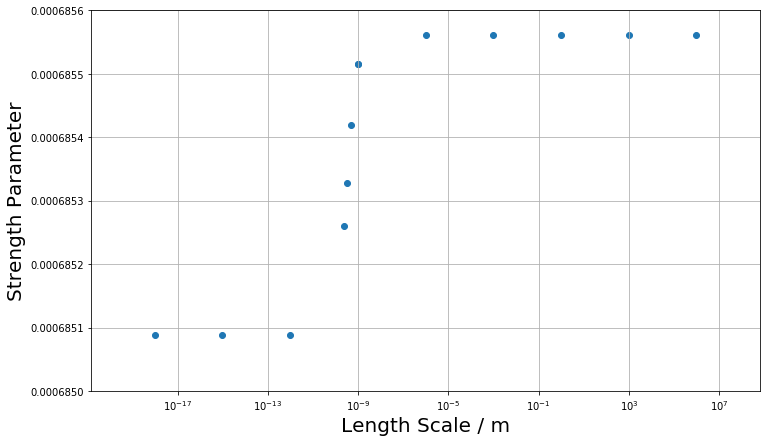

In [53]:
def eneToDist(ene):
    """Convert energy in eV to distance"""
    return ((197e6)/ene) * 1e-15

# For 1e5 events
yukawa = np.array([200,200e3, 200e6, 200e-3, 200e-6, 200e-9]) # eV
separation = np.array([686.381, 685.954, 685.954, 686.426, 686.426, 686.426]) # N=1e5

yukawa_1e6 = np.array([200,200e3, 200e6, 200e-3, 200e-6, 200e-9, 200e9, 200e2, 400, 600, 800, 200e1, 200e-15])
separation_1e6 = np.array([6863.81,  6859.54, 6859.54, 6864.26, 6864.26, 6864.26, 6859.54,6859.54, 6862.84, 6861.93, 6861.25, 6859.89, 6864.26])/1e6


yukawa_1e9 = np.array([200, 2e-13, 2e-10, 2e-07, 0.0002, 0.2, 200, 400, 600,800, 200000, 2e+08,2e+11])
sep_1e9 = np.array([685516, 685561, 685561, 685561, 685561, 685516, 685419, 685328,685260,685089,685089,685089])/1e9



    
yukawa_1e9 = np.array([200, 2e-13, 2e-10, 2e-07, 0.0002, 0.2, 200, 400, 600, 800, 200000, 2e8, 2e11])
sep_1e9 = np.array([685516, 685561, 685561, 685561, 685561, 685561, 685516, 685419, 685328, 685260, 685089, 685089, 685089])/1e9


plt.figure(figsize=(12,7))
plt.ylim(6.85e-4, 6.856e-4)
plt.semilogx()
plt.grid()
plt.scatter(eneToDist(yukawa_1e9), sep_1e9)
plt.xlabel("Length Scale / m", fontsize=20)
plt.ylabel("Strength Parameter", fontsize=20)

## Limit Setting attempt

/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: InitialParamWarning: Parameter norm is floating but does not have initial step size. Assume 1.
/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: InitialParamWarning: Parameter g_square is floating but does not have initial step size. Assume 1.
/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: InitialParamWarning: Parameter norm is floating but does not have initial step size. Assume 1.
/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: InitialParamWarning: Parameter g_square is floating but does not have initial step size. Assume 1.
/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: InitialParamWarning: Parameter norm is floating but does not have initial step size. Assume 1.
/Users/joesingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: InitialParamWarning: Parameter 

------------------------------------------------------------------
| FCN = 141.6                   |     Ncalls=204 (204 total)     |
| EDM = 2.61E-05 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 171                     |     Ncalls=190 (190 total)     |
| EDM = 1.56E-09 (Goal: 1E-05)  |            up = 1.0         

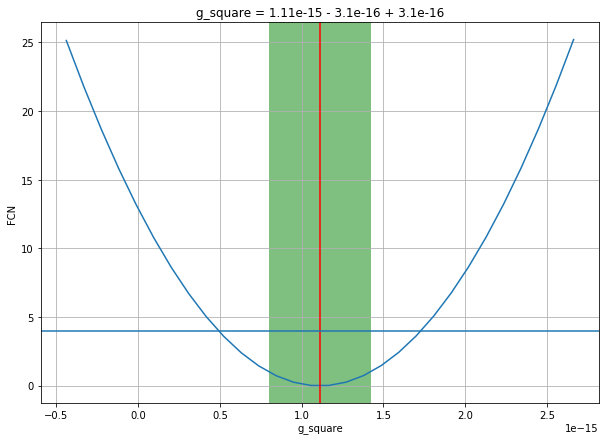

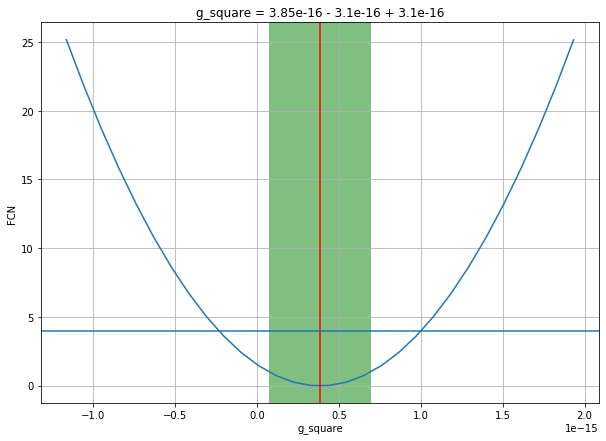

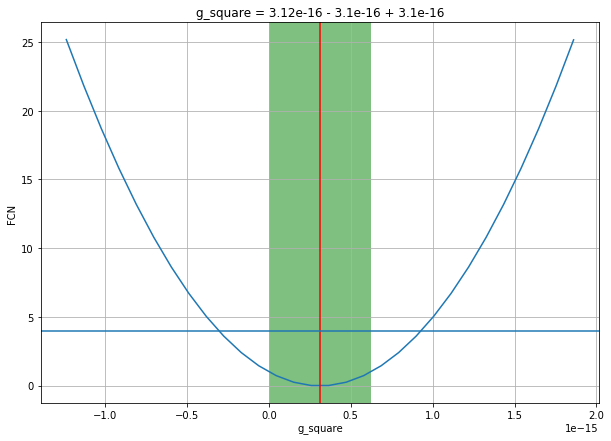

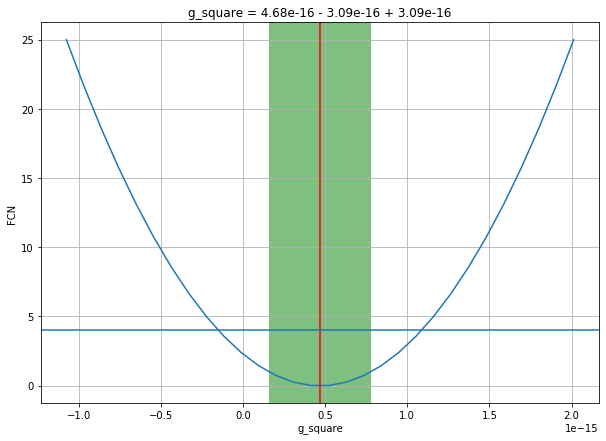

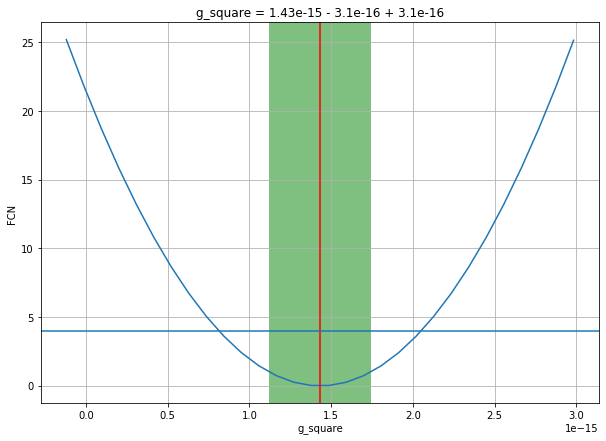

In [66]:

Z = 54 # Xenon 
wavelength = 1 # Å
lattice_spacing = 100 # Å 
mu = 200 # eV
q_0 = 6.86 # Å^-1
k = 2*np.pi/wavelength # Å^-1


b_F = -1.468e-3 # fm, Foldy scattering length from VF Sears article 

r_N_square = -0.1161 # PRL, fm^2
a_0 = 5.2917721067e4 # Scipy value, fm
b_I = (1/3)*(const.m_p/const.m_e)*(r_N_square/a_0) # fm Intrinsic scattering length
b_c = 4.92 # fm, Xe coherent scattering length from NIST database

# Dimensionless constants from scattering lengths
x_em = -Z*(b_F + b_I)/b_c # Need - sign to make a sensible em x-section, also Sears Eq 3.19 has - out front

# Now let's bring in the new force. Formula from PRL, depends on µ and g

h_bar = 6.58211956e-16 # eV s
c_angstrom_per_sec = 2.998e+18 # speed of light in angstrom per second

def f(q):
    return 1/np.sqrt(1 + 3*(q/q_0)**2)

def newForce(angle, params=list):
    norm = params[0]
    g_squared = params[1]
    mu = params[2]
    wavelength = params[3]
    k = 2*np.pi/wavelength
    
    mu_gev = mu*1e-9; # GeV
    xe_nuclear = 122; # GeV c^-2
    neutron_nuclear = 0.93957; # GeV c^-2
    b_c_ev = 25; # GeV^-1 
    m_n = 0.93957; # ?? weird m_n term in GeV, neutron mass?? Discussed with Alex he thinks it's neutron mass also which 
                        # is weird because then why have it in Q_1 as well? 
    x_new = m_n*g_squared*xe_nuclear*neutron_nuclear/(2*np.pi*b_c_ev*mu_gev**2);
    
    q = 2*k*np.sin(angle/2)
    constTerm = 1
    emTerm = 2*x_em*(1-f(q))
    
    mu_sq = mu**2
    q_mom = q * h_bar * c_angstrom_per_sec
    q_mom_sq = q_mom ** 2
    newTerm = 2*x_new * mu_sq / (mu_sq + q_mom_sq)
    
    return norm*b_c**2 * (constTerm + emTerm + newTerm)

# g_squared = 1e-14 GeV^-2 N=1e8
angles_14 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_14 = np.array([728241, 707028, 699846, 696230, 694326, 694361, 690549, 692607, 689360, 690593, 690986, 690081, 689432, 690604, 688740, 688666, 688495, 689424, 689333, 690095, 688658, 688841, 690000, 687076, 689195, 688943, 688523, 688162, 691380, 689597, 690539, 689167, 688982, 691204, 690676, 690668, 689091, 689806, 691006, 689190, 690977, 691624, 690838, 690292, 690527, 690138, 689812, 690259, 692102, 692450, 689279, 691362, 691381, 692660, 691493, 691601, 693457, 691992, 693240, 693005, 692930, 692391, 693746, 693207, 692047, 693532, 692567, 693517, 692609, 693343, 693742, 693046, 693566, 695123, 695115, 693129, 693856, 694419, 694241, 693697, 694495, 694163, 695567, 694230, 696192, 694813, 695151, 693495, 694808, 696321, 695774, 695818, 695394, 694854, 694632, 696256, 695489, 695200, 695296, 698730, 696530, 698088, 694929, 697867, 697058, 696868, 696978, 695625, 696037, 695202, 696381, 697865, 696784, 694458, 697447, 696761, 698358, 696992, 697180, 699083, 697215, 699359, 697552, 696823, 696721, 699271, 698299, 698819, 699224, 698440, 699310, 698442, 699214, 700910, 699733, 700682, 700194, 700674, 701503, 700324, 701614, 700161, 701393, 702950])
errs_14 = np.array([874.477, 848.91, 840.132, 835.721, 833.249, 832.403, 829.083, 829.996, 827.806, 828.361, 828.454, 827.801, 827.328, 827.92, 826.769, 826.702, 826.587, 827.14, 827.087, 827.552, 826.72, 826.85, 827.569, 825.841, 827.174, 827.056, 826.875, 826.697, 828.666, 827.637, 828.244, 827.462, 827.394, 828.814, 828.542, 828.582, 827.68, 828.155, 828.921, 827.877, 829.043, 829.478, 829.053, 828.772, 828.96, 828.774, 828.625, 828.988, 830.141, 830.396, 828.54, 829.885, 829.943, 830.805, 830.151, 830.263, 831.423, 830.59, 831.385, 831.29, 831.338, 831.06, 831.919, 831.641, 830.991, 831.927, 831.393, 832.053, 831.553, 832.038, 832.321, 831.949, 832.305, 833.283, 833.366, 832.218, 832.697, 833.079, 833.058, 832.774, 833.337, 833.18, 834.064, 833.304, 834.523, 833.738, 833.982, 833.071, 833.9, 834.848, 834.561, 834.628, 834.415, 834.131, 834.117, 835.132, 834.71, 834.576, 834.674, 836.772, 835.57, 836.543, 834.685, 836.525, 836.077, 836.039, 836.142, 835.368, 835.653, 835.188, 835.933, 836.86, 836.285, 834.925, 836.755, 836.38, 837.446, 836.698, 836.847, 838.023, 836.938, 838.294, 837.348, 836.945, 836.918, 838.652, 838.102, 838.448, 838.723, 838.319, 838.973, 838.484, 839.14, 840.19, 839.515, 840.147, 840.042, 840.485, 841.042, 840.456, 841.554, 840.74, 841.907, 843.309])

# g_squared = 1e-15 GeV^-2 N=1e8
angles_15 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_15 = np.array([691799, 686855, 687577, 686705, 687668, 688523, 687079, 685821, 688089, 687150, 687541, 687483, 689302, 688608, 688026, 688342, 689625, 687810, 689304, 688173, 689401, 689093, 686224, 688164, 689860, 689619, 689541, 690437, 689681, 689007, 690102, 692838, 690646, 689816, 691234, 691018, 691292, 691201, 691473, 692309, 690288, 691007, 690867, 692071, 691735, 692070, 691914, 692032, 692733, 691421, 692388, 694157, 691788, 691475, 692294, 694628, 693512, 693500, 693748, 694610, 694488, 691935, 693765, 693014, 693968, 693069, 693526, 694620, 695000, 695185, 695331, 695382, 693717, 694649, 695789, 694844, 694258, 695846, 693321, 695046, 697109, 696369, 693798, 696380, 696731, 694945, 695788, 696442, 695832, 695652, 697378, 696505, 695533, 696701, 696448, 696008, 698266, 697181, 696600, 696221, 697102, 697263, 695902, 698247, 698331, 697784, 696724, 698575, 698243, 698698, 698043, 697711, 698042, 698834, 698120, 698098, 696495, 699093, 698723, 698598, 699102, 698946, 699556, 699473, 698282, 700101, 699279, 700675, 701512, 698375, 700365, 700370, 701681, 702523, 700108, 700696, 702143, 699900, 700593, 701818, 701803, 702569, 702367, 703823])
errs_15 = np.array([829.215, 825.064, 825.129, 824.456, 824.974, 825.473, 824.646, 823.929, 825.335, 824.823, 825.111, 825.134, 826.284, 825.991, 825.704, 825.957, 826.791, 825.766, 826.727, 826.113, 826.979, 826.858, 825.2, 826.429, 827.575, 827.494, 827.574, 828.175, 827.784, 827.442, 828.161, 829.863, 828.611, 828.234, 829.145, 829.076, 829.301, 829.306, 829.528, 830.088, 828.993, 829.482, 829.456, 830.236, 830.091, 830.349, 830.312, 830.494, 830.971, 830.238, 830.874, 832.044, 830.677, 830.596, 831.14, 832.594, 831.977, 832.022, 832.224, 832.792, 832.822, 831.341, 832.49, 832.089, 832.713, 832.223, 832.547, 833.301, 833.578, 833.738, 833.874, 833.954, 833.002, 833.609, 834.388, 833.868, 833.563, 834.563, 833.139, 834.221, 835.548, 835.15, 833.652, 835.247, 835.502, 834.475, 835.025, 835.506, 835.183, 835.118, 836.197, 835.716, 835.176, 835.919, 835.894, 835.672, 837.067, 836.458, 836.151, 835.965, 836.616, 836.754, 835.976, 837.464, 837.553, 837.305, 836.707, 837.857, 837.698, 838.008, 837.654, 837.494, 837.769, 838.282, 837.891, 837.916, 837.065, 838.699, 838.514, 838.475, 838.815, 838.793, 839.303, 839.289, 838.609, 839.911, 839.452, 840.325, 840.86, 839.046, 840.377, 840.413, 841.397, 841.936, 840.52, 840.937, 841.998, 840.81, 841.289, 842.147, 842.471, 842.99, 843.306, 844.657])

# g_squared = 1e-16 GeV^-2 N=1e9
angles_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_16 = np.array([6.86778e+06, 6.86491e+06, 6.86188e+06, 6.86166e+06, 6.8682e+06, 6.86846e+06, 6.86978e+06, 6.87008e+06, 6.87052e+06, 6.87529e+06, 6.87164e+06, 6.87843e+06, 6.87973e+06, 6.87575e+06, 6.88031e+06, 6.87983e+06, 6.88219e+06, 6.88698e+06, 6.88248e+06, 6.88484e+06, 6.88816e+06, 6.88769e+06, 6.8875e+06, 6.89747e+06, 6.894e+06, 6.89265e+06, 6.89941e+06, 6.89977e+06, 6.90145e+06, 6.90503e+06, 6.90397e+06, 6.90477e+06, 6.90837e+06, 6.90523e+06, 6.91137e+06, 6.91303e+06, 6.90487e+06, 6.91273e+06, 6.91106e+06, 6.91202e+06, 6.91617e+06, 6.91171e+06, 6.92e+06, 6.92051e+06, 6.9186e+06, 6.9174e+06, 6.92309e+06, 6.92329e+06, 6.91906e+06, 6.92179e+06, 6.9225e+06, 6.92785e+06, 6.92497e+06, 6.93164e+06, 6.93112e+06, 6.92572e+06, 6.9334e+06, 6.93828e+06, 6.93175e+06, 6.93224e+06, 6.94367e+06, 6.9388e+06, 6.94133e+06, 6.94068e+06, 6.93769e+06, 6.93891e+06, 6.94329e+06, 6.94434e+06, 6.94524e+06, 6.94977e+06, 6.947e+06, 6.94429e+06, 6.947e+06, 6.94488e+06, 6.9487e+06, 6.95446e+06, 6.94979e+06, 6.95374e+06, 6.95372e+06, 6.95514e+06, 6.95501e+06, 6.95372e+06, 6.95355e+06, 6.95731e+06, 6.96052e+06, 6.95755e+06, 6.96225e+06, 6.96078e+06, 6.96151e+06, 6.96509e+06, 6.96624e+06, 6.96574e+06, 6.96127e+06, 6.96432e+06, 6.96791e+06, 6.97184e+06, 6.96985e+06, 6.96849e+06, 6.96786e+06, 6.97094e+06, 6.97361e+06, 6.97587e+06, 6.97219e+06, 6.98056e+06, 6.9751e+06, 6.98176e+06, 6.98009e+06, 6.97775e+06, 6.97777e+06, 6.9787e+06, 6.98261e+06, 6.98293e+06, 6.98397e+06, 6.98273e+06, 6.98391e+06, 6.98518e+06, 6.9902e+06, 6.98725e+06, 6.98821e+06, 6.98984e+06, 6.99264e+06, 6.99171e+06, 6.99516e+06, 6.99262e+06, 6.99277e+06, 6.99765e+06, 7.00296e+06, 6.99986e+06, 7.00258e+06, 6.9997e+06, 7.00246e+06, 7.00232e+06, 7.00386e+06, 7.00655e+06, 7.00532e+06, 7.00882e+06, 7.01241e+06, 7.01392e+06, 7.01666e+06, 7.014e+06, 7.02446e+06, 7.02444e+06, 7.03116e+06, 7.0391e+06])
errs_16 = np.array([2605.39, 2604.7, 2604.24, 2604.39, 2605.84, 2606.11, 2606.82, 2607.11, 2607.43, 2608.57, 2608.11, 2609.63, 2610.11, 2609.82, 2610.91, 2611.05, 2611.72, 2612.86, 2612.23, 2612.9, 2613.97, 2614.09, 2614.28, 2616.38, 2616.15, 2616.11, 2617.81, 2618.08, 2618.6, 2619.49, 2619.49, 2619.84, 2620.73, 2620.53, 2621.89, 2622.4, 2621.05, 2622.73, 2622.6, 2622.98, 2624.14, 2623.48, 2625.24, 2625.52, 2625.34, 2625.3, 2626.56, 2626.96, 2626.33, 2627.03, 2627.34, 2628.71, 2628.33, 2629.94, 2630.01, 2629.16, 2630.78, 2631.87, 2630.8, 2631.06, 2633.56, 2632.8, 2633.44, 2633.48, 2633.07, 2633.46, 2634.45, 2634.96, 2635.29, 2636.3, 2635.93, 2635.57, 2636.24, 2635.99, 2637.02, 2638.26, 2637.52, 2638.42, 2638.71, 2639.13, 2639.39, 2639.29, 2639.4, 2640.26, 2641.01, 2640.59, 2641.62, 2641.62, 2641.89, 2642.71, 2643.07, 2643.11, 2642.4, 2643.11, 2644.2, 2645.08, 2644.83, 2644.7, 2644.72, 2645.43, 2646.33, 2646.88, 2646.31, 2648.15, 2647.24, 2648.76, 2648.56, 2648.25, 2648.37, 2648.67, 2649.54, 2649.72, 2650.16, 2650.05, 2650.39, 2650.75, 2652.06, 2651.73, 2652.03, 2652.46, 2653.11, 2653.16, 2654.27, 2653.9, 2654.04, 2655.64, 2656.75, 2656.27, 2656.9, 2656.57, 2657.52, 2657.6, 2658.52, 2659.14, 2659.01, 2659.88, 2661.17, 2661.96, 2662.67, 2662.56, 2665.6, 2665.78, 2668.45, 2671.46])

# g_squared = 4e-16 N = 1e8
angles_4_16 = np.array([ 0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_4_16 = np.array([688037, 686631, 685922, 688025, 688351, 686177, 686057, 688193, 687862, 686833, 685949, 687564, 687094, 686397, 687227, 689530, 687999, 687429, 689588, 687182, 688863, 687854, 688430, 689007, 690524, 689042, 691142, 690820, 689109, 690212, 690004, 690376, 690271, 691618, 689381, 690275, 691681, 690254, 689904, 690021, 691457, 691905, 692607, 691311, 690532, 691795, 692124, 692154, 691617, 691274, 691845, 692317, 692929, 694734, 692178, 693687, 693317, 692959, 695427, 694271, 693835, 694475, 693433, 691865, 694680, 693883, 694081, 694524, 694548, 694476, 695439, 694493, 696339, 695131, 696506, 694700, 695913, 695588, 694310, 695335, 695751, 695366, 696521, 694975, 695151, 695936, 695441, 695039, 696696, 696164, 696614, 696533, 697025, 697320, 698082, 697590, 696651, 697076, 697695, 697974, 696799, 696704, 696646, 696980, 697215, 697927, 699040, 697698, 699374, 697145, 697778, 696951, 700840, 698538, 699235, 698296, 696957, 700483, 699089, 698295, 701371, 700067, 697769, 698119, 698753, 699177, 700241, 700324, 699653, 700083, 700713, 700934, 700879, 700311, 701090, 701354, 701080, 700846, 701535, 700463, 702673, 702147, 702478, 705523])
errs_4_16 = np.array([825.419, 824.151, 823.628, 824.878, 825.098, 823.836, 823.874, 825.218, 825.084, 824.534, 824.07, 825.108, 824.894, 824.614, 825.182, 826.632, 825.783, 825.51, 826.874, 825.498, 826.643, 826.105, 826.518, 826.931, 827.973, 827.15, 828.54, 828.411, 827.449, 828.175, 828.114, 828.4, 828.399, 829.332, 828.051, 828.649, 829.553, 828.758, 828.608, 828.738, 829.718, 830.046, 830.525, 829.806, 829.395, 830.211, 830.466, 830.597, 830.331, 830.18, 830.579, 830.972, 831.394, 832.584, 831.105, 832.064, 831.895, 831.732, 833.265, 832.624, 832.467, 832.902, 832.327, 831.436, 833.177, 832.749, 832.918, 833.282, 833.346, 833.352, 833.978, 833.46, 834.615, 833.939, 834.858, 833.822, 834.597, 834.449, 833.775, 834.436, 834.777, 834.591, 835.329, 834.447, 834.597, 835.113, 834.86, 834.707, 835.745, 835.469, 835.783, 835.778, 836.116, 836.336, 836.919, 836.666, 836.144, 836.441, 836.854, 837.063, 836.48, 836.464, 836.469, 836.75, 836.931, 837.437, 838.143, 837.378, 838.423, 837.124, 837.543, 837.085, 839.494, 838.153, 838.608, 838.083, 837.391, 839.581, 838.783, 838.342, 840.224, 839.515, 838.279, 838.526, 838.941, 839.407, 840.079, 840.164, 839.795, 840.122, 840.637, 840.802, 840.968, 840.661, 841.16, 841.384, 841.412, 841.43, 841.906, 841.387, 843.046, 842.79, 843.426, 845.73])

# g_squared = 6e-16 N = 1e8
angles_6_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_6_16 = np.array([689973, 685811, 688244, 686161, 686712, 687288, 688026, 686508, 688267, 687671, 688018, 687665, 687885, 687875, 688992, 687932, 689106, 689242, 687492, 689727, 689333, 687943, 689108, 689355, 690666, 689787, 689690, 691137, 690195, 689064, 689642, 688738, 691763, 690072, 690322, 691522, 690873, 691231, 689600, 690458, 690801, 691758, 691778, 692593, 693261, 690283, 692059, 692528, 692399, 691909, 692492, 692465, 692089, 693733, 693780, 692164, 694778, 694237, 694033, 693049, 691618, 694705, 693511, 694508, 695611, 694104, 693717, 695724, 693532, 695032, 694336, 695421, 693798, 694477, 694115, 695035, 694293, 696149, 695455, 694683, 694807, 695521, 694544, 695168, 694903, 694613, 695023, 695302, 697041, 695784, 696297, 695609, 696684, 696449, 695708, 696250, 696529, 698539, 696717, 698488, 697835, 698709, 697632, 696783, 697887, 697694, 697149, 697404, 698499, 697015, 698754, 697088, 698253, 697324, 699176, 698025, 697545, 699042, 698228, 698536, 700418, 698465, 699049, 699905, 699523, 700023, 699096, 698780, 699717, 700127, 700146, 701260, 701285, 700478, 700292, 700506, 702075, 700490, 701721, 703638, 701840, 702297, 704456, 704756])
errs_6_16 = np.array([827.093, 823.919, 825.19, 823.883, 824.21, 824.579, 825.109, 824.252, 825.365, 825.069, 825.341, 825.193, 825.391, 825.518, 826.255, 825.687, 826.458, 826.607, 825.624, 827.032, 826.93, 826.162, 826.927, 827.141, 828.059, 827.596, 827.667, 828.599, 828.098, 827.483, 827.892, 827.412, 829.29, 828.399, 828.61, 829.391, 829.062, 829.337, 828.418, 828.992, 829.316, 829.949, 830.02, 830.566, 831.024, 829.295, 830.418, 830.812, 830.791, 830.552, 830.957, 831.051, 830.879, 831.973, 832.055, 831.139, 832.759, 832.488, 832.418, 831.88, 831.124, 833.028, 832.362, 833.011, 833.723, 832.87, 832.687, 833.989, 832.724, 833.673, 833.303, 834.004, 833.078, 833.533, 833.411, 834.01, 833.612, 834.772, 834.448, 834.032, 834.196, 834.671, 834.129, 834.549, 834.434, 834.305, 834.595, 834.851, 835.937, 835.227, 835.578, 835.208, 835.897, 835.799, 835.48, 835.848, 836.056, 837.303, 836.253, 837.356, 837.087, 837.652, 837.046, 836.617, 837.318, 837.282, 836.994, 837.186, 837.883, 837.03, 838.113, 837.152, 837.928, 837.408, 838.556, 837.905, 837.729, 838.701, 838.25, 838.471, 839.637, 838.538, 839.032, 839.582, 839.387, 839.899, 839.376, 839.222, 839.817, 840.132, 840.28, 840.981, 841.195, 840.744, 840.664, 840.858, 841.992, 841.199, 842.001, 843.274, 842.529, 842.862, 844.595, 845.253])

# g^2 = 3e-16 N = 1e8
angles_3_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_3_16 = np.array([687933, 686463, 688386, 685480, 686589, 687582, 687932, 683821, 687895, 686811, 687251, 686974, 688011, 688335, 688124, 687114, 688365, 687392, 688318, 688068, 689473, 688682, 688286, 687929, 689519, 689637, 689123, 689345, 689794, 690329, 690642, 690343, 690103, 690743, 690670, 689997, 690865, 691194, 689973, 689957, 692937, 692356, 691517, 693105, 691680, 690805, 691338, 692854, 691932, 691589, 691683, 693674, 691830, 693489, 691656, 693799, 693232, 692981, 694350, 693758, 693641, 695997, 694366, 694063, 693833, 694198, 693422, 693778, 694114, 693979, 694823, 695140, 696341, 694464, 695406, 696117, 694433, 693887, 696266, 695763, 695994, 695175, 696853, 696550, 695036, 694877, 696358, 697101, 697371, 696502, 694371, 696614, 696372, 696213, 696851, 696924, 697692, 697378, 697751, 697039, 697423, 697247, 698203, 698730, 698397, 695472, 697952, 697833, 698077, 697637, 697105, 698247, 698813, 698876, 699313, 697878, 698485, 696997, 698197, 699596, 698240, 697851, 698362, 700889, 699146, 701024, 701020, 700083, 699457, 700179, 699491, 701927, 700917, 699407, 702362, 702328, 700935, 701753, 701060, 702350, 704295, 702809, 702590, 703987])
errs_3_16 = np.array([825.1, 823.921, 825.021, 823.289, 823.994, 824.641, 824.973, 822.571, 825.085, 824.503, 824.837, 824.741, 825.434, 825.769, 825.712, 825.176, 825.997, 825.482, 826.108, 826.027, 827.007, 826.6, 826.43, 826.282, 827.37, 827.507, 827.33, 827.527, 827.861, 828.247, 828.498, 828.382, 828.301, 828.809, 828.827, 828.485, 829.067, 829.325, 828.653, 828.702, 830.61, 830.32, 829.875, 830.886, 830.089, 829.622, 829.999, 831.022, 830.525, 830.375, 830.487, 831.791, 830.739, 831.843, 830.796, 832.137, 831.849, 831.751, 832.625, 832.322, 832.356, 833.819, 832.893, 832.762, 832.675, 832.945, 832.528, 832.841, 833.092, 833.06, 833.615, 833.855, 834.623, 833.545, 834.205, 834.679, 833.716, 833.435, 834.955, 834.7, 834.929, 834.483, 835.535, 835.399, 834.536, 834.485, 835.418, 835.952, 836.157, 835.679, 834.443, 835.833, 835.731, 835.679, 836.189, 836.275, 836.776, 836.63, 836.895, 836.51, 836.863, 836.798, 837.411, 837.808, 837.647, 835.971, 837.499, 837.467, 837.653, 837.427, 837.147, 837.871, 838.287, 838.363, 838.662, 837.84, 838.317, 837.498, 838.256, 839.131, 838.355, 838.193, 838.644, 840.196, 839.185, 840.523, 840.555, 840.028, 839.686, 840.188, 839.912, 841.406, 840.999, 840.126, 841.931, 841.976, 841.333, 841.983, 841.63, 842.528, 844.027, 843.196, 843.503, 844.818])

# g^2 = 5e-16 N = 1e8
angles_5_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_5_16 = np.array([687164, 686089, 685871, 685493, 687746, 687175, 685225, 687915, 686911, 686804, 688309, 687046, 690225, 687630, 686055, 688837, 688750, 689072, 687656, 689142, 689029, 688436, 689167, 689429, 689277, 687946, 691024, 690306, 690980, 688616, 689566, 691064, 690915, 691024, 691586, 689641, 691956, 691539, 690529, 690003, 690737, 691425, 692479, 692515, 689838, 691679, 691403, 692552, 692978, 693073, 694208, 693693, 693430, 693497, 694375, 692249, 693452, 693672, 693521, 695607, 693503, 694459, 694287, 694398, 693465, 695302, 692554, 692981, 694327, 694757, 694979, 694873, 694562, 695933, 696488, 696435, 696135, 696315, 695323, 694775, 694943, 696156, 694435, 697499, 695941, 696006, 695324, 695782, 695664, 696849, 695566, 695805, 695927, 696299, 696425, 696638, 694824, 697807, 696555, 696369, 698081, 697616, 697233, 696834, 697498, 698917, 695621, 698276, 698009, 696916, 697914, 696986, 697263, 698247, 697865, 699490, 697540, 698230, 699332, 698408, 698224, 700406, 700250, 699457, 700403, 700539, 699702, 700715, 700847, 699843, 699549, 701189, 698930, 701022, 699293, 700698, 700932, 701793, 701743, 700641, 702568, 703405, 703781, 703594])
errs_5_16 = np.array([825.151, 823.956, 823.682, 823.421, 824.783, 824.474, 823.401, 825.074, 824.533, 824.532, 825.501, 824.81, 826.783, 825.363, 824.485, 826.223, 826.239, 826.5, 825.719, 826.678, 826.745, 826.456, 826.961, 827.185, 827.225, 826.492, 828.468, 828.102, 828.57, 827.215, 827.849, 828.811, 828.783, 828.973, 829.372, 828.265, 829.716, 829.526, 828.98, 828.723, 829.282, 829.754, 830.444, 830.524, 828.975, 830.138, 830.029, 830.831, 831.143, 831.255, 831.991, 831.792, 831.689, 831.837, 832.417, 831.195, 831.97, 832.154, 832.117, 833.419, 832.262, 832.886, 832.834, 832.951, 832.442, 833.594, 831.995, 832.35, 833.207, 833.514, 833.696, 833.681, 833.543, 834.413, 834.841, 834.857, 834.724, 834.879, 834.376, 834.094, 834.285, 835.058, 834.07, 835.954, 835.064, 835.148, 834.783, 835.146, 835.119, 835.873, 835.147, 835.334, 835.45, 835.716, 835.918, 836.088, 835.039, 836.872, 836.163, 836.092, 837.242, 837.004, 836.814, 836.655, 837.093, 838.024, 836.084, 837.717, 837.597, 836.979, 837.617, 837.099, 837.341, 837.971, 837.778, 838.791, 837.734, 838.222, 838.92, 838.402, 838.329, 839.71, 839.76, 839.321, 839.923, 840.216, 839.748, 840.391, 840.503, 839.969, 839.93, 840.947, 839.79, 841.079, 840.073, 840.982, 841.315, 841.99, 842.023, 841.485, 842.974, 843.536, 844.2, 844.565])

# g^2 = 7e-16 N = 1e8
angles_7_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_7_16 = np.array([687803, 687115, 686385, 685938, 686856, 687872, 688566, 687238, 688286, 687713, 687727, 688409, 687559, 688394, 688882, 687690, 689141, 686802, 687832, 687049, 687885, 687810, 688693, 689601, 689945, 689710, 691486, 688848, 688240, 690634, 689119, 690852, 691035, 689036, 691388, 690317, 693936, 691053, 690554, 691160, 691955, 691863, 692486, 690745, 692181, 692364, 692562, 692435, 692922, 693617, 693562, 691400, 691633, 691715, 692941, 694774, 691587, 693346, 693080, 693698, 693392, 694460, 695639, 694111, 693687, 693438, 693809, 692104, 694711, 693987, 695144, 695019, 693724, 695165, 695071, 693932, 695065, 695922, 695130, 694916, 694376, 695606, 695120, 695262, 695651, 695148, 694790, 694832, 695905, 695340, 695619, 697116, 696067, 697661, 696998, 697473, 698374, 698340, 698663, 697407, 696743, 697840, 697297, 696592, 696810, 696165, 698042, 697311, 697480, 699573, 696552, 699204, 697679, 698672, 697914, 697945, 698377, 696923, 700124, 698916, 700082, 699271, 699660, 700338, 699476, 699860, 700651, 700496, 699939, 699381, 700189, 700209, 702443, 702071, 701063, 701110, 700725, 701726, 701950, 700594, 702376, 702390, 703500, 704741])
errs_7_16 = np.array([826.048, 824.831, 824.159, 823.811, 824.344, 824.967, 825.458, 824.712, 825.396, 825.111, 825.18, 825.652, 825.206, 825.838, 826.196, 825.547, 826.484, 825.147, 825.832, 825.428, 826.062, 826.083, 826.679, 827.29, 827.626, 827.55, 828.743, 827.225, 826.923, 828.423, 827.576, 828.679, 828.85, 827.774, 829.246, 828.664, 830.895, 829.227, 828.987, 829.41, 830.005, 830.008, 830.44, 829.453, 830.372, 830.539, 830.714, 830.751, 831.099, 831.571, 831.593, 830.406, 830.6, 830.756, 831.545, 832.698, 830.838, 831.947, 831.84, 832.262, 832.182, 832.874, 833.632, 832.766, 832.563, 832.463, 832.736, 831.81, 833.424, 833.039, 833.781, 833.756, 833.026, 833.939, 833.977, 833.341, 834.068, 834.629, 834.246, 834.164, 833.93, 834.714, 834.467, 834.598, 834.875, 834.618, 834.448, 834.561, 835.248, 834.952, 835.163, 836.105, 835.519, 836.518, 836.246, 836.574, 837.155, 837.176, 837.412, 836.7, 836.424, 837.123, 836.836, 836.494, 836.664, 836.356, 837.521, 837.122, 837.263, 838.556, 836.783, 838.413, 837.575, 838.209, 837.791, 837.848, 838.22, 837.42, 839.379, 838.69, 839.427, 839.013, 839.389, 839.832, 839.35, 839.792, 840.3, 840.243, 839.942, 839.675, 840.297, 840.342, 841.88, 841.691, 841.118, 841.211, 841.173, 841.932, 842.129, 841.439, 842.841, 842.909, 844.013, 845.234])

# g^2 = 8e-16 N = 1e8
angles_8_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_8_16 = np.array([689494, 689798, 687964, 688101, 687239, 687521, 688361, 686200, 686707, 686428, 688030, 688036, 687699, 687724, 686963, 688395, 688276, 688945, 688319, 689997, 688890, 689022, 689475, 688805, 690287, 690120, 691318, 689679, 689528, 690399, 689693, 687857, 691070, 690785, 690397, 689390, 690409, 691214, 690950, 691716, 691508, 692352, 691479, 690816, 692732, 693018, 693772, 691599, 693636, 691177, 691866, 691570, 692474, 693505, 692623, 693672, 694227, 694865, 692489, 693245, 693354, 693008, 693949, 694686, 693949, 692535, 693414, 693223, 693114, 694339, 695178, 694384, 694800, 693310, 695205, 693828, 694926, 695570, 694231, 694489, 696649, 695357, 694494, 695680, 696680, 695250, 696611, 697104, 695525, 696107, 695285, 696459, 695697, 695840, 697104, 695406, 698188, 696310, 698536, 696286, 696235, 696743, 698008, 697827, 698444, 696887, 698895, 697251, 698380, 699492, 699611, 698682, 698211, 698362, 698518, 698029, 698480, 698441, 701091, 700038, 699514, 699375, 698553, 698272, 698850, 698539, 701431, 700655, 700071, 700384, 700292, 699317, 699377, 700124, 701000, 700528, 700907, 701014, 701901, 702090, 701513, 701835, 703423, 703521])
errs_8_16 = np.array([ 827.319, 826.57, 825.192, 825.17, 824.622, 824.795, 825.362, 824.112, 824.468, 824.356, 825.376, 825.441, 825.301, 825.444, 825.052, 825.977, 825.971, 826.438, 826.129, 827.2, 826.668, 826.813, 827.15, 826.813, 827.831, 827.796, 828.642, 827.723, 827.695, 828.281, 827.919, 826.879, 828.87, 828.822, 828.65, 828.105, 828.778, 829.321, 829.222, 829.74, 829.733, 830.298, 829.832, 829.492, 830.698, 830.927, 831.436, 830.244, 831.522, 830.103, 830.571, 830.503, 831.099, 831.826, 831.349, 832.032, 832.417, 832.852, 831.48, 831.985, 832.154, 831.997, 832.613, 833.105, 832.714, 831.915, 832.492, 832.476, 832.46, 833.244, 833.795, 833.368, 833.666, 832.819, 834.051, 833.272, 833.978, 834.411, 833.7, 833.901, 835.287, 834.558, 834.085, 834.842, 835.486, 834.673, 835.534, 835.918, 835.013, 835.406, 834.956, 835.704, 835.289, 835.418, 836.303, 835.326, 837.036, 835.951, 837.328, 836.02, 836.111, 836.457, 837.255, 837.228, 837.636, 836.782, 838.025, 837.078, 837.795, 838.5, 838.611, 838.092, 837.886, 838.015, 838.146, 837.891, 838.274, 838.324, 839.951, 839.355, 839.079, 839.068, 838.717, 838.585, 838.967, 838.991, 840.76, 840.33, 840.013, 840.269, 840.35, 839.798, 840.032, 840.515, 841.072, 840.854, 841.274, 841.497, 842.092, 842.328, 842.315, 842.567, 843.958, 844.493])

# g^2 = 7.5e-16 
angles_75_16 = np.array([0.0505, 0.0705, 0.0865, 0.1005, 0.1125, 0.1225, 0.1415, 0.1505, 0.1585, 0.1665, 0.1745, 0.1815, 0.1885, 0.2015, 0.2075, 0.2135, 0.2195, 0.2255, 0.2315, 0.2365, 0.2475, 0.2525, 0.2575, 0.2625, 0.2725, 0.2775, 0.2865, 0.2915, 0.2955, 0.3005, 0.3045, 0.3095, 0.3135, 0.3215, 0.3255, 0.3295, 0.3345, 0.3385, 0.3425, 0.3455, 0.3535, 0.3575, 0.3615, 0.3655, 0.3685, 0.3725, 0.3765, 0.3835, 0.3875, 0.3905, 0.3945, 0.4015, 0.4045, 0.4115, 0.4145, 0.4185, 0.4215, 0.4245, 0.4285, 0.4315, 0.4385, 0.4415, 0.4445, 0.4475, 0.4515, 0.4545, 0.4575, 0.4635, 0.4665, 0.4695, 0.4725, 0.4765, 0.4795, 0.4825, 0.4885, 0.4915, 0.4945, 0.4975, 0.5035, 0.5065, 0.5115, 0.5145, 0.5175, 0.5205, 0.5235, 0.5265, 0.5295, 0.5355, 0.5375, 0.5405, 0.5435, 0.5465, 0.5495, 0.5525, 0.5605, 0.5635, 0.5655, 0.5685, 0.5715, 0.5745, 0.5825, 0.5855, 0.5875, 0.5935, 0.5955, 0.6015, 0.6035, 0.6065, 0.6095, 0.6115, 0.6145, 0.6175, 0.6225, 0.6255, 0.6275, 0.6305, 0.6385, 0.6435, 0.6465, 0.6485, 0.6515, 0.6565, 0.6665, 0.6695, 0.6715, 0.6875, 0.6895, 0.6925, 0.6945, 0.6995, 0.7105, 0.7125, 0.7275, 0.7305, 0.7325, 0.7375, 0.7525, 0.7655, 0.7705, 0.7805, 0.8075, 0.8125, 0.8505, 0.8935])
intensities_75_16 = np.array([689709, 689243, 686676, 686131, 686724, 687379, 687183, 687257, 687672, 687952, 688464, 687778, 690026, 689157, 688700, 688519, 688012, 688404, 687823, 688125, 688300, 689380, 689670, 688513, 689020, 689845, 688793, 689508, 688960, 690527, 690639, 690242, 689564, 692069, 690741, 692060, 691728, 691275, 691224, 690568, 691884, 689954, 691609, 690689, 692145, 692528, 692324, 692222, 691632, 691810, 691514, 692158, 692577, 693919, 692483, 691962, 691189, 693117, 693949, 694388, 693218, 694037, 691829, 695452, 693467, 693285, 693335, 695923, 693759, 696973, 694408, 695278, 695116, 694788, 693169, 694354, 694855, 692914, 695783, 696989, 696670, 695606, 696487, 696476, 696383, 695577, 695393, 696092, 695432, 696521, 696854, 696562, 695682, 696682, 696651, 696033, 697660, 696846, 696756, 697395, 697267, 697519, 697693, 697595, 697791, 698064, 695476, 698478, 698165, 697577, 698191, 699397, 699644, 698067, 698531, 700083, 698324, 699284, 699113, 698062, 698528, 701025, 699370, 699073, 698553, 698926, 699382, 699058, 699503, 700439, 699280, 700170, 701190, 699562, 701656, 700028, 701191, 701221, 701253, 702184, 701659, 702781, 701459, 703886])
errs_75_16 = np.array([827.32, 826.172, 824.377, 823.958, 824.289, 824.691, 824.643, 824.735, 825.038, 825.262, 825.63, 825.28, 826.691, 826.299, 826.091, 826.048, 825.81, 826.111, 825.829, 826.076, 826.313, 827.027, 827.266, 826.637, 827.072, 827.631, 827.127, 827.62, 827.355, 828.358, 828.488, 828.313, 827.967, 829.592, 828.857, 829.709, 829.571, 829.359, 829.388, 829.053, 829.961, 828.861, 829.912, 829.418, 830.349, 830.635, 830.57, 830.621, 830.323, 830.485, 830.363, 830.859, 831.164, 832.077, 831.268, 831.009, 830.597, 831.807, 832.359, 832.674, 832.075, 832.618, 831.343, 833.568, 832.428, 832.369, 832.448, 834.1, 832.85, 834.826, 833.337, 833.908, 833.859, 833.71, 832.833, 833.591, 833.939, 832.82, 834.635, 835.404, 835.303, 834.711, 835.284, 835.322, 835.312, 834.872, 834.807, 835.314, 834.961, 835.658, 835.901, 835.769, 835.284, 835.927, 836.035, 835.706, 836.723, 836.277, 836.264, 836.689, 836.735, 836.927, 837.071, 837.093, 837.249, 837.493, 835.977, 837.819, 837.671, 837.356, 837.763, 838.526, 838.75, 837.843, 838.158, 839.127, 838.184, 838.834, 838.769, 838.174, 838.491, 840.061, 839.212, 839.07, 838.792, 839.228, 839.535, 839.376, 839.676, 840.306, 839.747, 840.314, 841.125, 840.182, 841.47, 840.558, 841.449, 841.625, 841.707, 842.389, 842.407, 843.139, 842.784, 844.717])

def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    #print(ndf)
    return (chisquarevalue, ndf)

def chisquare_newforce(norm,g_square,mu,wavelength):
    return chisquare_1d(function=newForce,functionparams=[norm,g_square,mu,wavelength],data_x=angles,data_y=intensities,data_y_error=errs)[0]

def do_all(angles, intensities, errs, muParam, g):
    def chisquare_newforce(norm,g_square,mu,wavelength):
        return chisquare_1d(function=newForce,functionparams=[norm,g_square,mu,wavelength],data_x=angles,data_y=intensities,data_y_error=errs)[0]

    m=Minuit(chisquare_newforce, 
         norm = 2e01, # set start parameter
         #error_norm = 3e-4,
         #limit_area= (limit_lower,limit_upper) # if you want to limit things
         #fix_area = "True", # you can also fix it
         g_square = g,
         #error_g_square = 5.0e-17,
         #fix_g_square = "True",
         #limit_mean = (3500,4500),
         mu = muParam,
         fix_mu = "True",
         wavelength = 1.0,
         fix_wavelength="True",
         errordef = 1,
         print_level=1)
        
    m.migrad(ncall=500000)
    #plt.figure(figsize=(10,7))
    #plt.errorbar(angles, intensities, errs, linestyle="", marker="o")
    #plt.plot(angles,newForce(angles,params=[m.values["norm"],m.values["g_square"],m.values["mu"],m.values["wavelength"]]))
    return m


et = do_all(angles_6_16, intensities_6_16, errs_6_16, 200.0, 6e-16)
plt.figure(figsize=(10,7))
yeet.draw_mnprofile('g_square',bound = 5, subtract_min=True)
plt.axhline(y=4)

et = do_all(angles_4_16, intensities_4_16, errs_4_16, 200.0, 4e-16)
plt.figure(figsize=(10,7))
et.draw_mnprofile('g_square',bound = 5, subtract_min=True)
plt.axhline(y=4)

yet = do_all(angles_3_16, intensities_3_16, errs_3_16, 200.0, 3e-16)
plt.figure(figsize=(10,7))
yet.draw_mnprofile('g_square',bound = 5, subtract_min=True)
plt.axhline(y=4)

b = do_all(angles_7_16, intensities_7_16, errs_7_16, 200.0, 7e-16)
plt.figure(figsize=(10,7))
b.draw_mnprofile('g_square',bound = 5, subtract_min=True)
plt.axhline(y=4)

c = do_all(angles_75_16, intensities_75_16, errs_75_16, 200.0, 7.5e-16)
plt.figure(figsize=(10,7))
c.draw_mnprofile('g_square',bound = 5, subtract_min=True)
plt.axhline(y=4)


In [67]:
## Test for c++ failing function

def millerPlanes(n, a, b, c):
    
    my_set = []
    millers = []
    
    for i in range(n):
        my_set.append(i)
        
    perms = []
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                millerH = my_set[i]
                millerK = my_set[j]
                millerL = my_set[k]
                
                if millerH == millerK == millerL == 0:
                    continue 
                
                quantity = (millerH/a)**2 + (millerK/b)**2 + (millerL/b)**2
                
                if quantity in millers:
                    continue
                
                perm = [millerH, millerK, millerL]
                perms.append(perm)
                millers.append(quantity)
    
    for m in millers:
        print(m)
    
    return perms

millerPlanes(4,10,10,10)

0.010000000000000002
0.04000000000000001
0.09
0.020000000000000004
0.05000000000000001
0.1
0.08000000000000002
0.13
0.18
0.030000000000000006
0.06000000000000001
0.11
0.09000000000000002
0.14
0.11000000000000001
0.19
0.12000000000000002
0.17
0.22
0.27


[[0, 0, 1],
 [0, 0, 2],
 [0, 0, 3],
 [0, 1, 1],
 [0, 1, 2],
 [0, 1, 3],
 [0, 2, 2],
 [0, 2, 3],
 [0, 3, 3],
 [1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 [1, 2, 2],
 [1, 2, 3],
 [1, 3, 1],
 [1, 3, 3],
 [2, 2, 2],
 [2, 2, 3],
 [2, 3, 3],
 [3, 3, 3]]